## Neural Network
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amasetti/AI-Portfolio-Examples/blob/master/2.%20Neural%20Network%20Mnist/main.ipynb)

A neural network is a computational model inspired by the structure and function of biological neural networks. It consists of interconnected nodes, or artificial neurons, organized into layers. Each neuron receives input, applies a transformation function to produce an output, and passes it to the next layer, allowing the network to learn complex patterns and relationships from data through iterative training processes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical


## Define the Neural Network model

In [3]:

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Load MNIST handwritten digit data

(60000, 28, 28)
(10000, 28, 28)


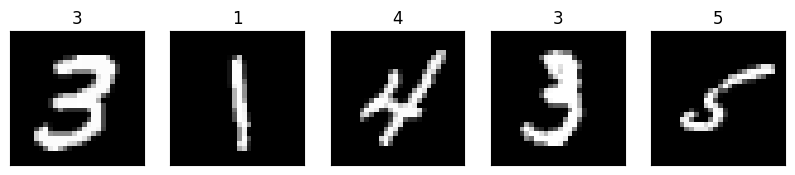

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
c = 0
for i in range(7, 12, 1):
    axes[c].set_title(y_train[i])
    axes[c].imshow(X_train[i], cmap='gray')
    axes[c].get_xaxis().set_visible(False)
    axes[c].get_yaxis().set_visible(False)
    c+=1

plt.show()

## How one-hot encoding works

3 -> [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [18]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Convert y_train and y_test into one-hot format

In [6]:

temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

## Train the model

We'll use categorical_crossentropy as our loss function and the adam algorithm for optimization. The Adam optimizer is an adaptive optimization algorithm commonly used in machine learning and deep learning. It is an extension of the stochastic gradient descent (SGD) algorithm that combines ideas from other optimization methods to provide efficient and effective updates to the model parameters during training.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 630us/step - loss: 1.5788 - acc: 0.5523 - val_loss: 1.1087 - val_acc: 0.7079
Epoch 2/5
1875/1875 [==============================] - 1s 528us/step - loss: 1.0136 - acc: 0.7216 - val_loss: 0.8768 - val_acc: 0.7708
Epoch 3/5
1875/1875 [==============================] - 1s 538us/step - loss: 0.8610 - acc: 0.7584 - val_loss: 0.8110 - val_acc: 0.7657
Epoch 4/5
1875/1875 [==============================] - 1s 524us/step - loss: 0.8060 - acc: 0.7743 - val_loss: 0.7308 - val_acc: 0.7983
Epoch 5/5
1875/1875 [==============================] - 1s 523us/step - loss: 0.7713 - acc: 0.7794 - val_loss: 0.7021 - val_acc: 0.8033


## Benchmarks
- Precision: Precision is a metric in machine learning that measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive, providing an indication of the model's ability to avoid false positives.

- Recall: Recall is a metric in machine learning that measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances, indicating the model's ability to identify all positive instances without missing any (minimizing false negatives).

- F1-score: The F1-score is a single metric that combines precision and recall, providing a balanced measure of a model's performance by taking their harmonic mean, representing a trade-off between precision and recall.

- Support: Support refers to the number of instances or observations in a given class or category, representing the frequency or distribution of that class within the dataset, which can influence the interpretation of performance metrics.

In [9]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

temp = []
for i in range(len(predictions)):    
    temp.append(to_categorical(predictions[i], num_classes=10))
predictions = np.array(temp)

acc = accuracy_score(predictions, y_test)
report = classification_report(predictions, y_test, digits=2)

print(f'Perceptron Accuracy: {acc*100}%')
print(report)

313/313 [==============================] - 0s 341us/step
Perceptron Accuracy: 80.33%
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       962
           1       0.96      0.89      0.93      1217
           2       0.82      0.90      0.86       939
           3       0.83      0.79      0.81      1068
           4       0.93      0.70      0.80      1311
           5       0.67      0.66      0.67       909
           6       0.92      0.84      0.88      1050
           7       0.63      0.93      0.75       701
           8       0.61      0.74      0.67       801
           9       0.71      0.69      0.70      1042

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.82      0.80      0.81     10000
 samples avg       0.80      0.80      0.80     10000



## Inference

313/313 [==============================] - 0s 345us/step


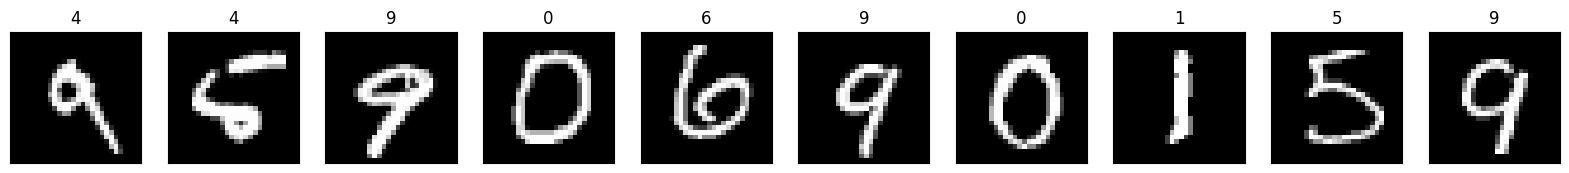

In [8]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))

c = 0
for i in range(7, 17 ,1):
    axes[c].set_title(predictions[i])
    axes[c].imshow(X_test[i], cmap='gray')
    axes[c].get_xaxis().set_visible(False)
    axes[c].get_yaxis().set_visible(False)
    c += 1
plt.show()